# Location Cursor on screen from EEG data

In [3]:
import numpy as np
import pandas as pd
import os 

#Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Pre-processing package
from sklearn.preprocessing import StandardScaler

#Dimentional Reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#Classification models packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

#Cross validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#Librairies de mesure de performance de modèle de classification
from sklearn.metrics import accuracy_score


## Data Importation

In [4]:
#Configuration du chemin
os.chdir("/home/boris/Bureau/Projets Celisse/EEG-DataSet/EEG_Full_Data")
#Healthy subject
traina = pd.read_csv('bsi_competition_ii_train1a.csv')
X_testa = pd.read_csv('bsi_competition_ii_test1a.csv')
#Diseased subject
trainb = pd.read_csv('bsi_competition_ii_train1b.csv')
X_testb = pd.read_csv('bsi_competition_ii_test1b.csv')

In [5]:
traina.name = 'traina'
X_testa.name = 'X_testa'
trainb.name = 'trainb'
X_testb.name = 'X_testb'

In [6]:
# function to check the shape of a dataset
def data_shape(data):
    print(data.name,'shape:',data.shape)
    
data_shape(traina)
data_shape(X_testa)
data_shape(trainb)
data_shape(X_testb)

traina shape: (268, 5377)
X_testa shape: (293, 5376)
trainb shape: (200, 8065)
X_testb shape: (180, 8064)


In [7]:
# function to check for missing values
def missing_val(data):
    print('Sum of missing values in', data.name)
    print('------------------------------')
    print(data.isnull().sum())
    print('------------------------------')
    
missing_val(traina)
missing_val(X_testa)
missing_val(trainb)
missing_val(X_testb)

Sum of missing values in traina
------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
5372    0
5373    0
5374    0
5375    0
5376    0
Length: 5377, dtype: int64
------------------------------
Sum of missing values in X_testa
------------------------------
1       0
2       0
3       0
4       0
5       0
       ..
5372    0
5373    0
5374    0
5375    0
5376    0
Length: 5376, dtype: int64
------------------------------
Sum of missing values in trainb
------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
8060    0
8061    0
8062    0
8063    0
8064    0
Length: 8065, dtype: int64
------------------------------
Sum of missing values in X_testb
------------------------------
1       0
2       0
3       0
4       0
5       0
       ..
8060    0
8061    0
8062    0
8063    0
8064    0
Length: 8064, dtype: int64
------------------------------


In [8]:
# Value count responce varibale
def value_counts_col(data, col):
    print('Value count in column', str(col), 'from', data.name)
    print('------------------------------')
    print(data.iloc[:,col].value_counts())
    print('------------------------------')
    
# Value count responce varibale
value_counts_col(traina, 0)
value_counts_col(trainb, 0)

Value count in column 0 from traina
------------------------------
0.0    135
1.0    133
Name: 0, dtype: int64
------------------------------
Value count in column 0 from trainb
------------------------------
1.0    100
0.0    100
Name: 0, dtype: int64
------------------------------


La répartition des valeurs de la variable réponse est équilibrée 

In [9]:
# Séparation de la variable réponse dans les données d'entrainement
y_traina = traina.iloc[:, 0]
y_trainb = trainb.iloc[:, 0]

X_traina = traina.iloc[:, 1:]
X_trainb = trainb.iloc[:, 1:]

##  Data Visualization

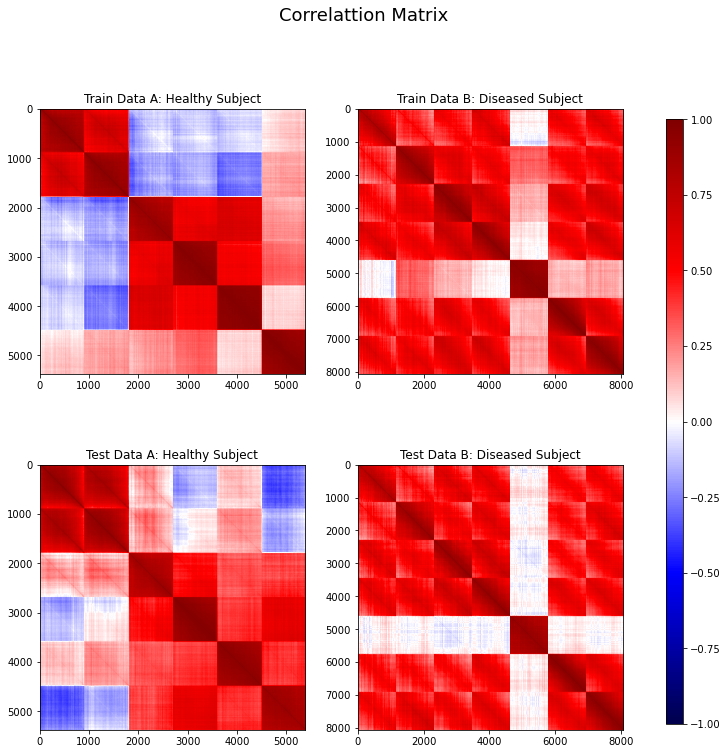

In [10]:
#Matrix de correlation
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))

fig.suptitle('Correlattion Matrix', fontsize = 18)

corr_matrix_train_a = np.corrcoef(np.transpose(X_traina)) 
im = ax11.imshow(corr_matrix_train_a, cmap='seismic', vmin=-1, vmax=1)
ax11.set_title('Train Data A: Healthy Subject')

corr_matrix_train_b = np.corrcoef(np.transpose(X_trainb)) 
im2 = ax12.imshow(corr_matrix_train_b, cmap='seismic', vmin=-1, vmax=1) 
ax12.set_title('Train Data B: Diseased Subject')

corr_matrix_test_a = np.corrcoef(np.transpose(X_testa)) 
im = ax21.imshow(corr_matrix_test_a, cmap='seismic', vmin=-1, vmax=1)
ax21.set_title('Test Data A: Healthy Subject')

corr_matrix_test_b = np.corrcoef(np.transpose(X_testb)) 
im2 = ax22.imshow(corr_matrix_test_b, cmap='seismic', vmin=-1, vmax=1) 
ax22.set_title('Test Data B: Diseased Subject')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('corr', dpi=75)
plt.show() 

In [11]:
## Sample by Canal Selection
sample_a = [0]
sample_b = [0]
np.random.seed(0)
for i in range (0, 6):
    sample_a.append(np.random.randint(1+890*i, 890*(i+1))) 


for i in range (0, 7):
    sample_b.append(np.random.randint(1+1152*i, 1152*(i+1))) 
    
viz_train_a = traina.iloc[:, sample_a]
viz_train_b = trainb.iloc[:, sample_b]

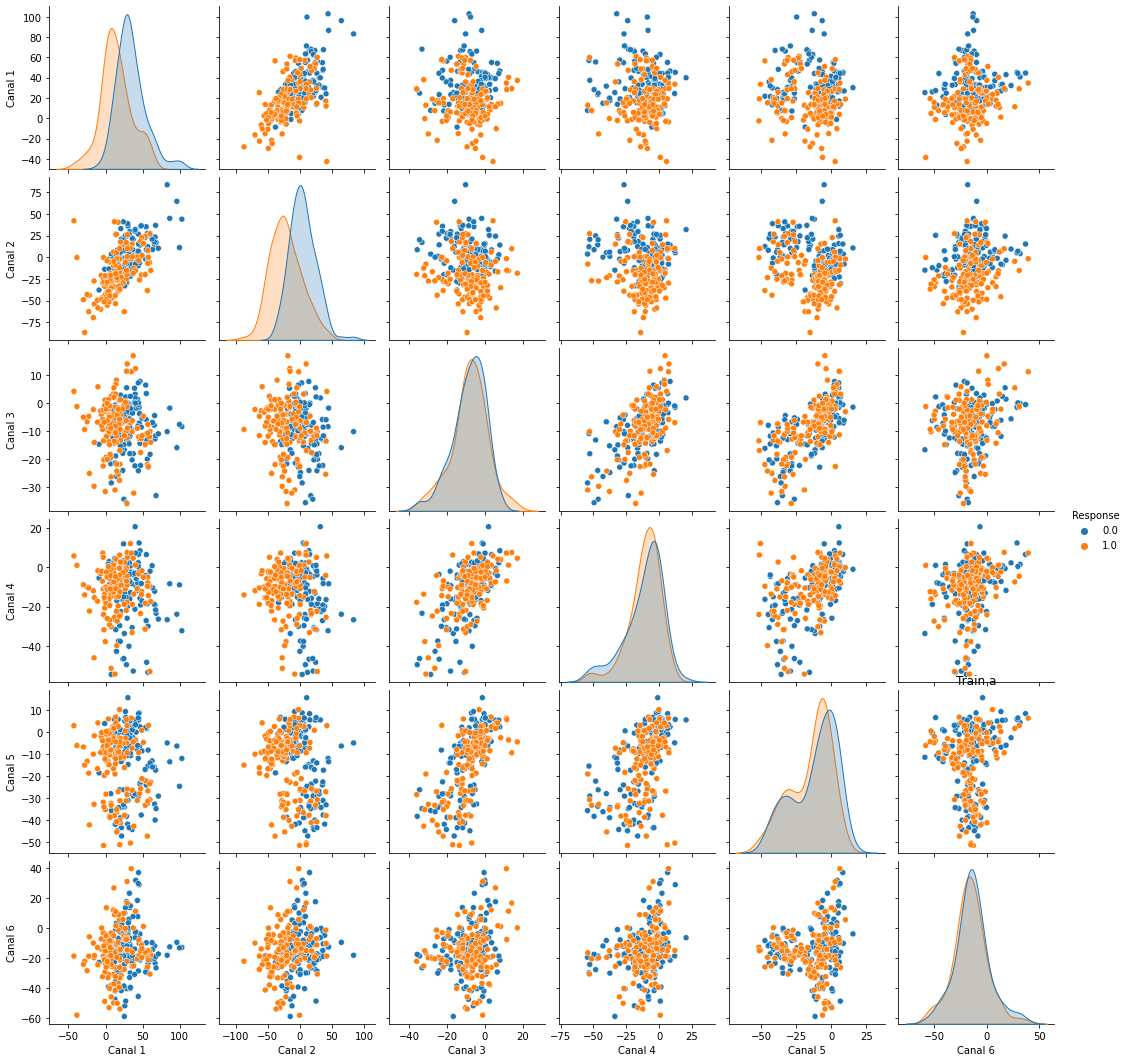

In [12]:
viz_train_a.columns = ['Response', 'Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6']
sns.pairplot(data=viz_train_a, hue='Response')
plt.title('Train a')
plt.savefig('corr_can1', dpi=75)
plt.show()

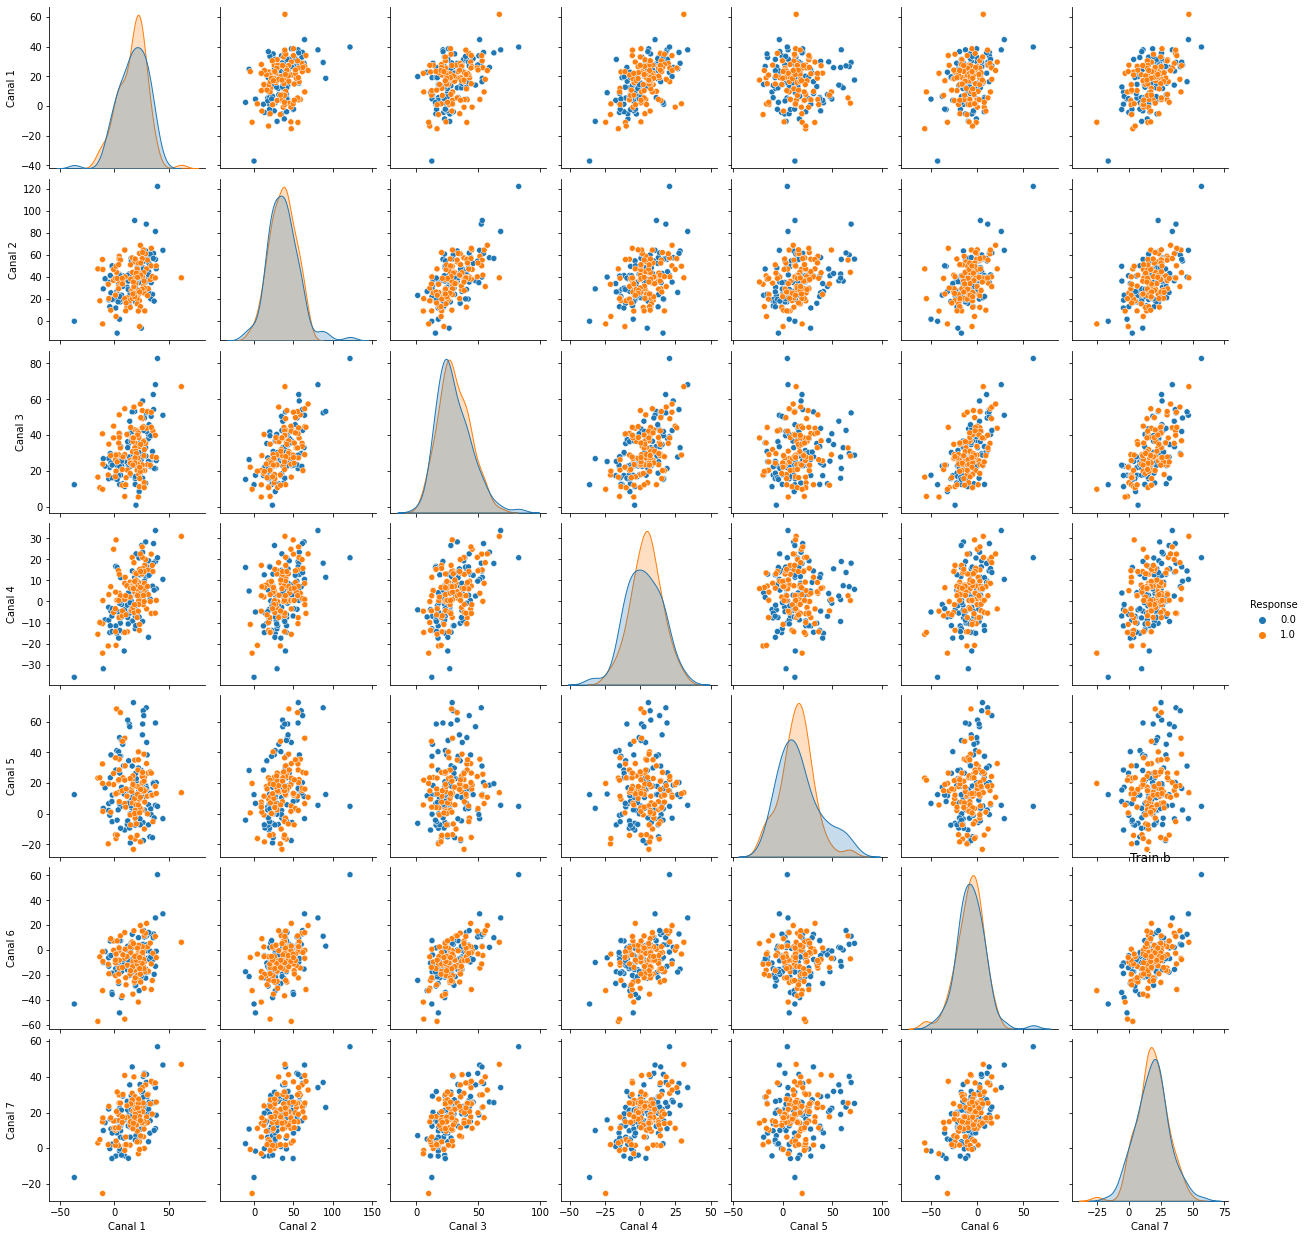

In [13]:
viz_train_b.columns = ['Response', 'Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6', 'Canal 7']
sns.pairplot(data=viz_train_b, hue='Response')
plt.title('Train b')
plt.savefig('corr_can2', dpi=75)
plt.show()

Linéairité de 

## Pre Processing

In [14]:
# NomStandardisation Scaling
sc = StandardScaler()
sc_traina = sc.fit_transform(X_traina)
sc_trainb = sc.fit_transform(X_trainb)

## Dimentional Reduction
### Number of components to be retained

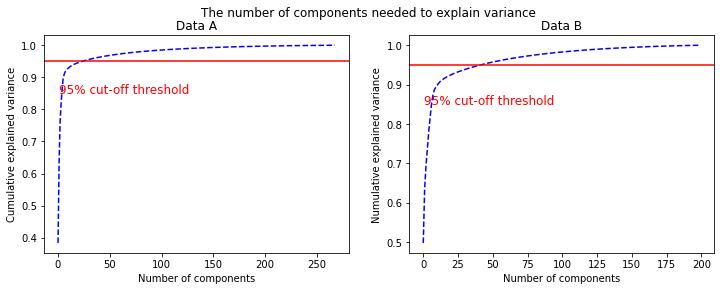

In [15]:
##Cumulative Sum variance ratio Subject A
pca_a = PCA().fit(sc_traina)
ya = np.cumsum(pca_a.explained_variance_ratio_)

pca_b = PCA().fit(sc_trainb)
yb = np.cumsum(pca_b.explained_variance_ratio_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

fig.suptitle('The number of components needed to explain variance')

ax1.plot(ya, linestyle='--', color='b')

ax1.set_xlabel('Number of components')
ax1.set_ylabel('Cumulative explained variance')

ax1.axhline(y=0.95, color='r', linestyle='-')
ax1.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)

ax1.set_title('Data A')

ax2.plot(yb, linestyle='--', color='b')

ax2.set_xlabel('Number of components')
ax2.set_ylabel('Numulative explained variance')


ax2.axhline(y=0.95, color='r', linestyle='-')
ax2.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)

ax2.set_title('Data B')
plt.savefig('variance expliquée A', dpi=75)
plt.show()

In [16]:
#%% Zoom
def x_scale (y, end, names):
    x = np.arange(1, end+1)
    y = y[:end]
    
    fig, ax = plt.subplots()
    plt.plot(x, y, linestyle='--', color='b')
    
    plt.ylim(0.0,1.1)
    
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=9)

    plt.title('The number of components needed to explain variance from Data '+names)

    ax.grid(axis='x')
    plt.savefig('variance expliquée', dpi=75)
    plt.show()

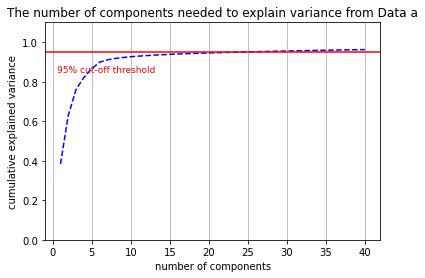

In [17]:
x_scale (ya, 40, 'a')


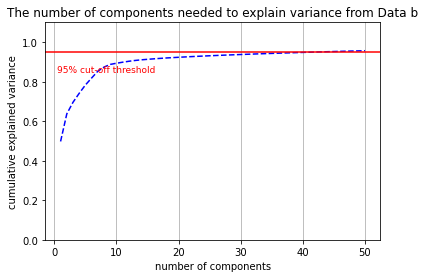

In [18]:
x_scale (yb, 50, 'b')

# Vizualisation

In [29]:
#Data_a
pca_a = PCA(n_components = 5)
pca_a.fit(sc_traina)
reduced_X_train_a = pca_a.transform(sc_traina)
 
#Data_b
pca_b = PCA(n_components = 10)
pca_b.fit(sc_trainb)
reduced_X_train_b = pca_b.transform(sc_trainb)

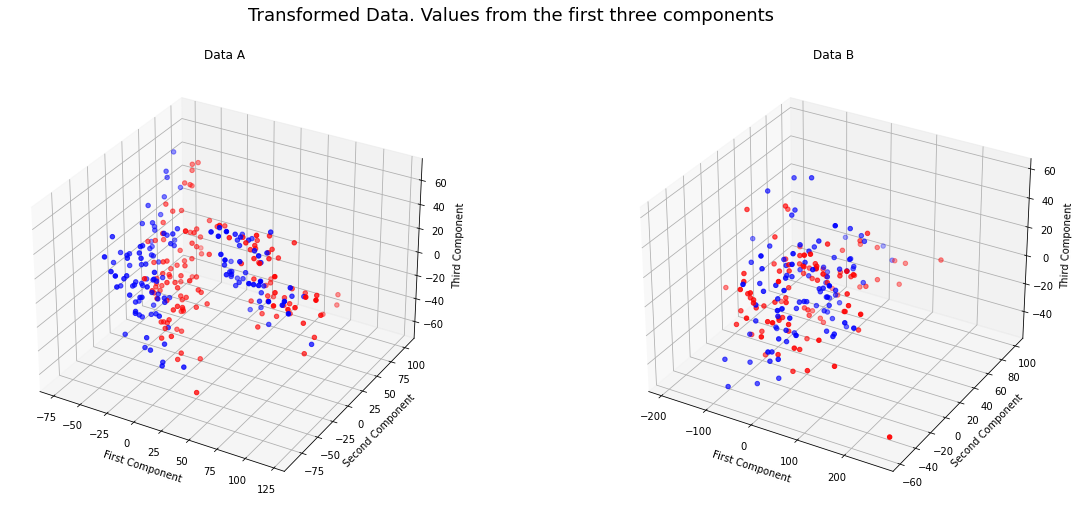

In [34]:
colors = {0:'red', 1:'blue'}
fig =  plt.figure(figsize=(20, 8))
fig.suptitle('Transformed Data. Values from the first three components', fontsize = 18)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(reduced_X_train_a[:,0], reduced_X_train_a[:,1], 
              reduced_X_train_a[:,2], c=y_traina.map(colors))
ax.set_title("Data A", fontsize = 12) 
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(reduced_X_train_b[:,0], reduced_X_train_b[:,1], 
              reduced_X_train_b[:,2], c=y_trainb.map(colors))
ax.set_title("Data B", fontsize = 12) 
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')
plt.savefig('3d', dpi=75)
plt.show()

## Modelling and Evaluation

In [31]:
#Fonction Classification
def Classfication (model, cv_method, folds, metric,  X_train, y_train):
    if (model == 'LR'):
        # creating an instance of the regression
        model_inst = LogisticRegression(max_iter=500, penalty = 'l1', solver='liblinear')
        print('Logistic Regression\n----------------------')
    elif (model == 'RFC'):
        # creating an instance of the classifier
        model_inst = RandomForestClassifier()
        print('Random Random Forest\n----------------------')
    elif (model == 'BNB'):
        # creating an instance of the classifier
        model_inst = BernoulliNB()
        print('Bernouilli Naive Bayes\n----------------------')   
    elif (model == 'ADB'):
        model_inst = AdaBoostClassifier(random_state = 0)
        print('AdaBoost\n----------------------')      
    elif (model == 'GB'):
        model_inst = GradientBoostingClassifier(random_state = 0)
        print('Gradient Boosting\n----------------------')
        
    # cross validation
    if (cv_method == 'KFold'):
        print('Cross validation: KFold\n--------------------------')
        cv = KFold(n_splits=folds)
    elif (cv_method == 'StratifiedKFold'):
        print('Cross validation: StratifiedKFold\n--------------------------')
        cv = StratifiedKFold(n_splits=folds)
    else:
        print('Cross validation method not found!')
    try:
        cv_scores = cross_validate(model_inst, X_train, y_train, 
                                   cv=cv, scoring=metric)   
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('')
            
    except:
        metrics = ['accuracy', 'f1', 'precision', 'recall']
        cv_scores = cross_validate(model_inst, X_train, y_train, 
                                   cv=cv, scoring=metrics)
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('--------------------------')
            
    return model_inst

In [32]:
models = ['LR', 'RFC', 'BNB', 'ADB', 'GB']
#Data A
for m in models:
    Classfication(m, 'StratifiedKFold', 5, 'accuracy', reduced_X_train_a, y_traina)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.09%

score_time: 0.04%

test_score: 73.88%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.55%

score_time: 0.54%

test_score: 74.64%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.03%

test_score: 65.70%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.26%

score_time: 0.45%

test_score: 72.03%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.61%

score_time: 0.04%

test_score: 73.16%



In [33]:
#Data B
for m in models:
    Classfication(m, 'StratifiedKFold', 5, 'accuracy', reduced_X_train_b, y_trainb)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.03%

test_score: 51.00%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.57%

score_time: 0.52%

test_score: 45.50%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.03%

test_score: 44.00%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.49%

score_time: 0.44%

test_score: 46.50%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 5.14%

score_time: 0.04%

test_score: 48.00%



## Patient B Case

### Kernel PCA

In [21]:
#%% KernelPCA
rfbpca_b = KernelPCA(kernel='rbf', n_components=10)
rfbpca_reduced_X_train_b = rfbpca_b.fit_transform(sc_trainb)

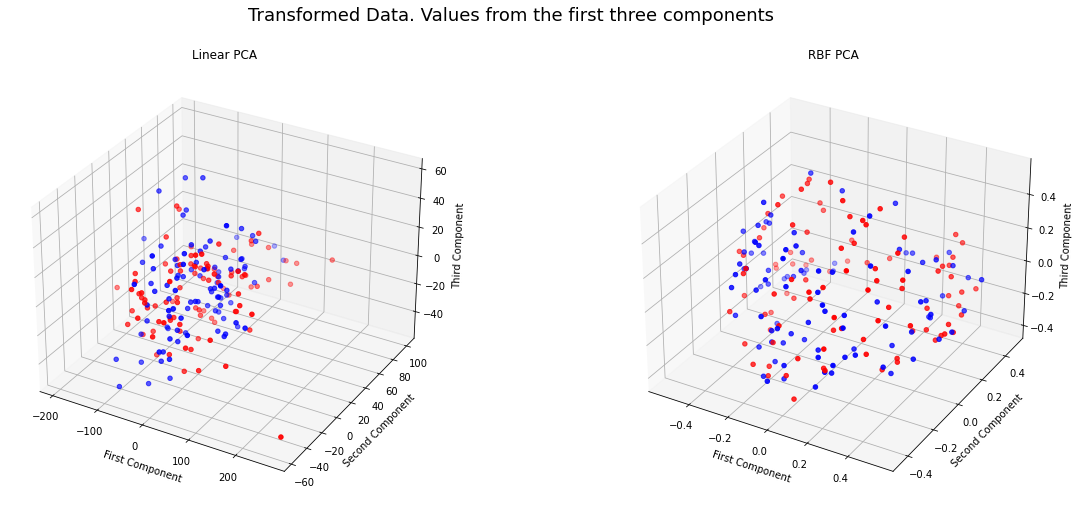

In [22]:
colors = {0:'red', 1:'blue'}
fig =  plt.figure(figsize=(20, 8))
fig.suptitle('Transformed Data. Values from the first three components', fontsize = 18)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(reduced_X_train_b[:,0], reduced_X_train_b[:,1], 
              reduced_X_train_b[:,2], c=y_trainb.map(colors))
ax.set_title("Linear PCA", fontsize = 12) 
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(rfbpca_reduced_X_train_b[:,0], rfbpca_reduced_X_train_b[:,1], 
              rfbpca_reduced_X_train_b[:,2], c=y_trainb.map(colors))
ax.set_title("RBF PCA", fontsize = 12) 
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')

plt.show()

In [23]:
for m in models:
    Classfication(m, 'StratifiedKFold', 5, 'accuracy', rfbpca_reduced_X_train_b, y_trainb)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.25%

score_time: 0.03%

test_score: 54.00%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.28%

score_time: 0.49%

test_score: 50.50%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.02%

test_score: 50.00%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.21%

score_time: 0.42%

test_score: 47.50%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.97%

score_time: 0.03%

test_score: 48.50%



#### L'hyperparamètre gamma

In [24]:
rfbpca_b1 = KernelPCA(kernel='rbf', n_components=10, gamma=0.00027)
rfbpca_b1.fit(sc_trainb)
rfbpca_reduced_X_train_b1 = rfbpca_b1.transform(sc_trainb)

rfbpca_b2 = KernelPCA(kernel='rbf', n_components=10, gamma=0.0003)
rfbpca_b2.fit(sc_trainb)
rfbpca_reduced_X_train_b2 = rfbpca_b2.transform(sc_trainb)

rfbpca_b3 = KernelPCA(kernel='rbf', n_components=10, gamma=0.00033)
rfbpca_b3.fit(sc_trainb)
rfbpca_reduced_X_train_b3 = rfbpca_b3.transform(sc_trainb)

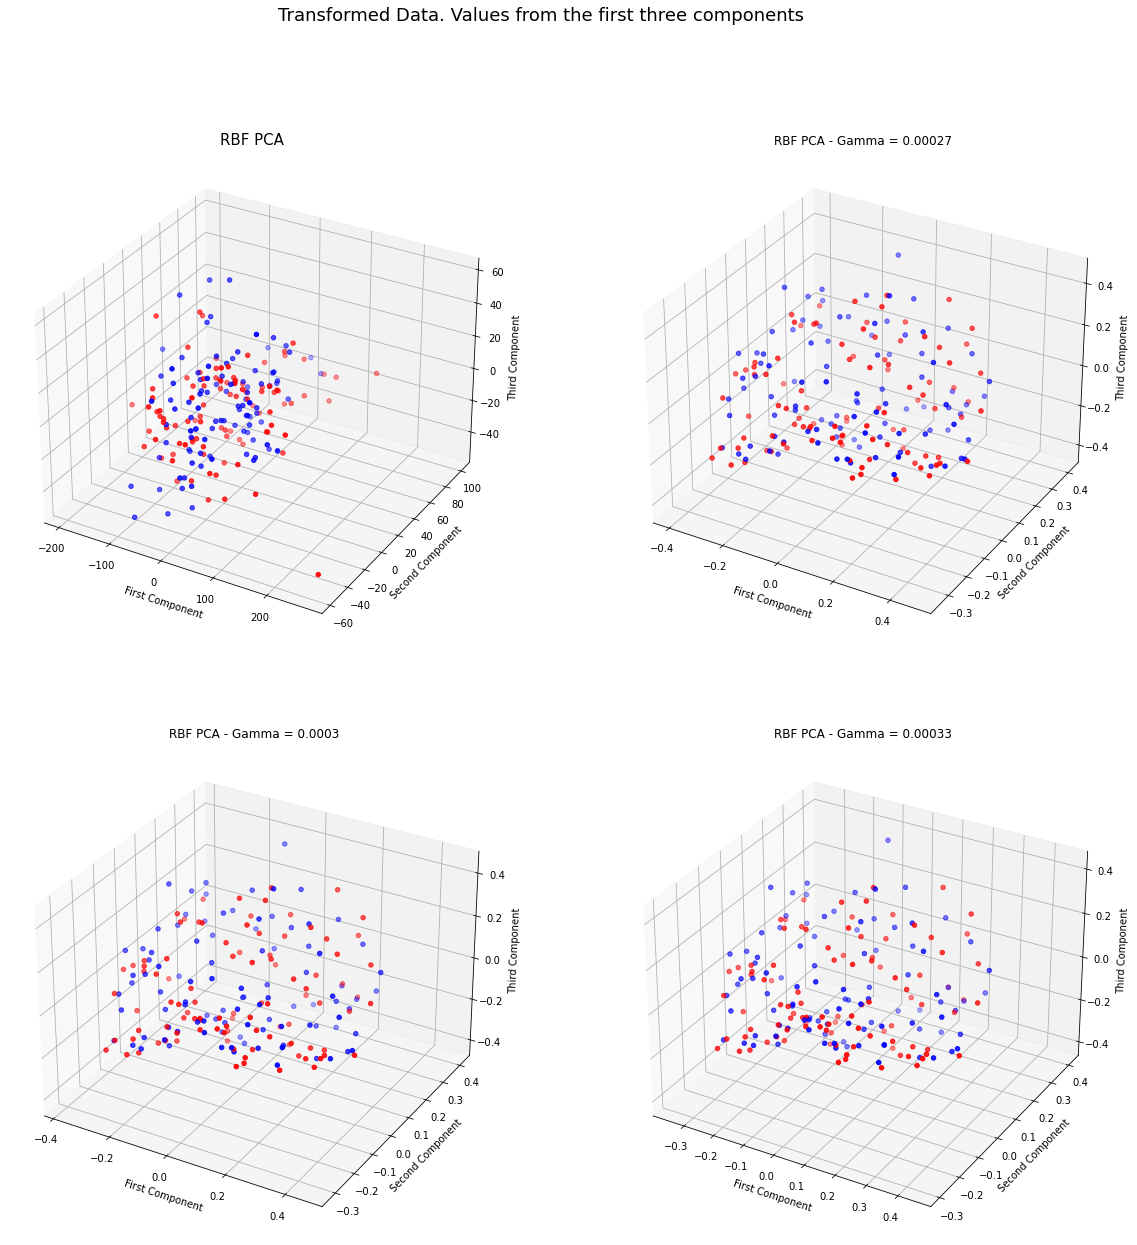

In [25]:
fig =  plt.figure(figsize=(20, 20))

fig.suptitle('Transformed Data. Values from the first three components', fontsize = 18)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter3D(reduced_X_train_b[:,0], reduced_X_train_b[:,1], 
              reduced_X_train_b[:,2], c=y_trainb.map(colors))
ax.set_title('RBF PCA ', fontsize=15)
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D(rfbpca_reduced_X_train_b1[:,0], rfbpca_reduced_X_train_b1[:,1], 
              rfbpca_reduced_X_train_b1[:,2], c=y_trainb.map(colors))
ax.set_title('RBF PCA - Gamma = 0.00027')
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')


ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter3D(rfbpca_reduced_X_train_b2[:,0], rfbpca_reduced_X_train_b2[:,1], 
              rfbpca_reduced_X_train_b2[:,2], c=y_trainb.map(colors))
ax.set_title('RBF PCA - Gamma = 0.0003')
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')


ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter3D(rfbpca_reduced_X_train_b3[:,0], rfbpca_reduced_X_train_b3[:,1], 
              rfbpca_reduced_X_train_b3[:,2], c=y_trainb.map(colors))
ax.set_title('RBF PCA - Gamma = 0.00033')
ax.set_xlabel('First Component') 
ax.set_ylabel('Second Component') 
ax.set_zlabel('Third Component')
plt.show()

In [26]:
for m in models:
    Classfication(m, 'StratifiedKFold', 4, 'accuracy', rfbpca_reduced_X_train_b1, y_trainb)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.26%

score_time: 0.03%

test_score: 58.00%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.32%

score_time: 0.50%

test_score: 49.50%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.02%

test_score: 45.00%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.07%

score_time: 0.41%

test_score: 48.50%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.78%

score_time: 0.04%

test_score: 48.00%



In [27]:
for m in models:
    Classfication(m, 'StratifiedKFold', 4, 'accuracy', rfbpca_reduced_X_train_b2, y_trainb)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.24%

score_time: 0.03%

test_score: 59.50%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.26%

score_time: 0.50%

test_score: 43.00%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.06%

score_time: 0.02%

test_score: 47.00%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.06%

score_time: 0.41%

test_score: 40.50%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.80%

score_time: 0.03%

test_score: 40.50%



In [28]:
for m in models:
    Classfication(m, 'StratifiedKFold', 4, 'accuracy', rfbpca_reduced_X_train_b3, y_trainb)

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.22%

score_time: 0.02%

test_score: 58.50%

Random Random Forest
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 8.04%

score_time: 0.49%

test_score: 43.00%

Bernouilli Naive Bayes
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.07%

score_time: 0.02%

test_score: 52.00%

AdaBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.04%

score_time: 0.41%

test_score: 39.50%

Gradient Boosting
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4.80%

score_time: 0.04%

test_score: 44.00%



### Stochastique Gradient Descent
Model: Régression Logistique
Methode d'apprentissage: Descente de Gradient Stochastique
Régularisation: Lasso

In [29]:
def SGDClassifer_CV_alpha(X_train, y_train, a, folds, cv_method, metric):
    
    print ('alpha: ' + str(a), '\n----------------------')
    scgd = SGDClassifier(loss = 'log', penalty = 'l1', fit_intercept = False, 
                             alpha=a, learning_rate='optimal')
    print('Stochastic Gradient Descent\n----------------------')
        
    # cross validation
    if (cv_method == 'KFold'):
        print('Cross validation: KFold\n--------------------------')
        cv = KFold(n_splits=folds)
    elif (cv_method == 'StratifiedKFold'):
        print('Cross validation: StratifiedKFold\n--------------------------')
        cv = StratifiedKFold(n_splits=folds)
    else:
        print('Cross validation method not found!')
    try:
        cv_scores = cross_validate(scgd, X_train, y_train, 
                                   cv=cv, scoring=metric)   
    # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('')
        
    except:
        metrics = ['accuracy', 'f1', 'precision', 'recall']
        cv_scores = cross_validate(scgd, X_train, y_train, 
                                   cv=folds, scoring=metrics)
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('--------------------------')
                
    return scgd

In [30]:
my_alphas = np.array([0.001,0.003,0.007,0.01,0.025,0.050,0.08,0.1,0.8,1.0])

In [31]:
for a in my_alphas:
    SGDClassifer_CV_alpha(sc_trainb,y_trainb, a, 4, 'StratifiedKFold', 'accuracy'  )

alpha: 0.001 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 9.05%

score_time: 0.06%

test_score: 50.00%

alpha: 0.003 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 9.95%

score_time: 0.06%

test_score: 52.00%

alpha: 0.007 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 15.82%

score_time: 0.05%

test_score: 53.00%

alpha: 0.01 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 15.34%

score_time: 0.07%

test_score: 55.50%

alpha: 0.025 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 14.44%

score_time: 

In [33]:
my_alphas2 = np.array([0.003, 0.007,0.01,0.013,0.015,0.018,0.020,0.022,0.025])
for a in my_alphas2:
    SGDClassifer_CV_alpha(sc_trainb,y_trainb, a, 4, 'StratifiedKFold', 'accuracy')

alpha: 0.003 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 11.48%

score_time: 0.06%

test_score: 51.50%

alpha: 0.007 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 17.65%

score_time: 0.06%

test_score: 52.00%

alpha: 0.01 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 22.77%

score_time: 0.06%

test_score: 54.00%

alpha: 0.013 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 23.04%

score_time: 0.06%

test_score: 54.50%

alpha: 0.015 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 30.24%

score_time

## Prediction sur les données de Test

In [36]:
#Standardisation
sc_testa = sc.fit_transform(X_testa)
sc_testb = sc.fit_transform(X_testb)

In [37]:
#Reduction de la dimensionalité
reduced_X_test_a = pca_a.transform(sc_testa)
reduced_X_test_b = rfbpca_b2.transform(sc_testb)

In [38]:
#Choix du model 
logreg_a = Classfication('LR', 'StratifiedKFold', 5, 'accuracy', reduced_X_train_a, y_traina)
logreg_b = Classfication('LR', 'StratifiedKFold', 4, 'accuracy', rfbpca_reduced_X_train_b2, y_trainb)
scgd_b = SGDClassifer_CV_alpha(sc_trainb,y_trainb, 0.01, 4, 'StratifiedKFold', 'accuracy'  )

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.68%

score_time: 0.02%

test_score: 88.82%

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 0.15%

score_time: 0.02%

test_score: 59.50%

alpha: 0.01 
----------------------
Stochastic Gradient Descent
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 25.45%

score_time: 0.06%

test_score: 52.50%



In [41]:
logreg_a.fit(reduced_X_train_a, y_traina)
y_pred_a = logreg_a.predict(reduced_X_test_a)

logreg_b.fit(reduced_X_train_b, y_trainb)
rfb_y_pred_b = logreg_a.predict(reduced_X_test_b)

scgd_b.fit(sc_trainb, y_trainb)
scgd_y_pred_b = scgd_b.predict(sc_testb)

In [55]:
print('Sorted Coefficients',np.sort(scgd_b.coef_))
print('---------------')
print('Number of Non null coefficient', np.count_nonzero(scgd_b.coef_))

Sorted Coefficients [[-5.60826875 -5.31006084 -5.12154831 ...  5.09608852  5.18833969
   5.51936479]]
---------------
Number of Non null coefficient 839


In [42]:
y_pred_a

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1.

In [43]:
rfb_y_pred_b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
scgd_y_pred_b

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1.])